In [ ]:
!wget https://figshare.com/ndownloader/articles/14267219/versions/4

In [ ]:
!pip install --user scikit-misc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.8 MB 5.3 MB/s 


In [1]:
!unzip human.zip -d /public3/xiongyy/analysis/human_atlas

Archive:  human.zip
 extracting: /public3/xiongyy/analysis/human_atlas/TS_Bladder.h5ad.zip  
 extracting: /public3/xiongyy/analysis/human_atlas/TS_Blood.h5ad.zip  
 extracting: /public3/xiongyy/analysis/human_atlas/TS_Bone_Marrow.h5ad.zip  
 extracting: /public3/xiongyy/analysis/human_atlas/TS_Eye.h5ad.zip  
 extracting: /public3/xiongyy/analysis/human_atlas/TS_Fat.h5ad.zip  
 extracting: /public3/xiongyy/analysis/human_atlas/TS_Heart.h5ad.zip  
 extracting: /public3/xiongyy/analysis/human_atlas/TS_Kidney.h5ad.zip  
 extracting: /public3/xiongyy/analysis/human_atlas/TS_Large_Intestine.h5ad.zip  
 extracting: /public3/xiongyy/analysis/human_atlas/TS_Liver.h5ad.zip  
 extracting: /public3/xiongyy/analysis/human_atlas/TS_Lung.h5ad.zip  
 extracting: /public3/xiongyy/analysis/human_atlas/TS_Lymph_Node.h5ad.zip  
 extracting: /public3/xiongyy/analysis/human_atlas/TS_Mammary.h5ad.zip  
 extracting: /public3/xiongyy/analysis/human_atlas/TS_Muscle.h5ad.zip  
 extracting: /public3/xiongyy/analy

In [2]:
!mv /public3/xiongyy/analysis/human_atlas/TS_stromal.h5ad.zip /public3/xiongyy/analysis/shit

In [3]:
import os
def get_file(path):          #获取文件路径
    res=[]
    for root, dirs, files in os.walk(path):
        for file in files:
            #print(file)     #文件名
            res.append(os.path.join(root,file))
    return res
get_file('/public3/xiongyy/analysis/human_atlas')

['/public3/xiongyy/analysis/human_atlas/TS_Bladder.h5ad.zip',
 '/public3/xiongyy/analysis/human_atlas/TS_Blood.h5ad.zip',
 '/public3/xiongyy/analysis/human_atlas/TS_Bone_Marrow.h5ad.zip',
 '/public3/xiongyy/analysis/human_atlas/TS_Eye.h5ad.zip',
 '/public3/xiongyy/analysis/human_atlas/TS_Fat.h5ad.zip',
 '/public3/xiongyy/analysis/human_atlas/TS_Heart.h5ad.zip',
 '/public3/xiongyy/analysis/human_atlas/TS_Kidney.h5ad.zip',
 '/public3/xiongyy/analysis/human_atlas/TS_Large_Intestine.h5ad.zip',
 '/public3/xiongyy/analysis/human_atlas/TS_Liver.h5ad.zip',
 '/public3/xiongyy/analysis/human_atlas/TS_Lung.h5ad.zip',
 '/public3/xiongyy/analysis/human_atlas/TS_Lymph_Node.h5ad.zip',
 '/public3/xiongyy/analysis/human_atlas/TS_Mammary.h5ad.zip',
 '/public3/xiongyy/analysis/human_atlas/TS_Muscle.h5ad.zip',
 '/public3/xiongyy/analysis/human_atlas/TS_Pancreas.h5ad.zip',
 '/public3/xiongyy/analysis/human_atlas/TS_Prostate.h5ad.zip',
 '/public3/xiongyy/analysis/human_atlas/TS_Salivary_Gland.h5ad.zip',
 '/

In [1]:
import anndata
import scanpy as sc
import os

def find_gene(path):
  name=path.split('/')[-1].split('.')[0]
  print('...unzip',name)
  os.system("unzip {0} -d /public3/xiongyy/analysis/human_atlas".format(path))
  adata=anndata.read_h5ad('/public3/xiongyy/analysis/human_atlas/{0}.h5ad'.format(name))
  sc.pp.highly_variable_genes(adata, n_top_genes=10000, flavor="seurat_v3")
  adata=adata[:,adata.var['highly_variable']==True]
  gene=adata.var.index.tolist()
  print('...get gene')
  del adata
  os.system("rm -f /public3/xiongyy/analysis/human_atlas/{0}.h5ad".format(name))
  print('...del')
  return gene



In [2]:
def clear():
  for key, value in globals().items():
    if callable(value) or value.__class__.__name__ == "module":
      continue
    del globals()[key]


In [6]:
import gc
ret_gene=find_gene('/public3/xiongyy/analysis/human_atlas/TS_Eye.h5ad.zip')
gc.collect()

...unzip TS_Eye
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Eye.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Eye.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


...get gene
...del


1761

In [7]:
gene_dict={}
import gc
for i in get_file('/public3/xiongyy/analysis/human_atlas'):
    name=i.split('/')[-1].split('.')[0]
    print('...unzip',name)
    os.system("unzip {0} -d /public3/xiongyy/analysis/human_atlas".format(i))
    adata=anndata.read_h5ad('/public3/xiongyy/analysis/human_atlas/{0}.h5ad'.format(name))
    sc.pp.highly_variable_genes(adata, n_top_genes=10000, flavor="seurat_v3")
    adata=adata[:,adata.var['highly_variable']==True]
    gene=adata.var.index.tolist()
    print('...get gene')
    #adata.__delete__()
    del adata
    gc.collect()
    os.system("rm -f /public3/xiongyy/analysis/human_atlas/{0}.h5ad".format(name))
    print('...del')

    gene_dict[name]=gene
    ret_gene=list(set(ret_gene) & set(gene))

...unzip TS_Bladder
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Bladder.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Bladder.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


...get gene
...del
...unzip TS_Blood
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Blood.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Blood.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


...get gene
...del
...unzip TS_Bone_Marrow
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Bone_Marrow.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Bone_Marrow.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


...get gene
...del
...unzip TS_Eye
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Eye.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Eye.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


...get gene
...del
...unzip TS_Fat
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Fat.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Fat.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


...get gene
...del
...unzip TS_Heart
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Heart.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Heart.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


...get gene
...del
...unzip TS_Kidney
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Kidney.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Kidney.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


...get gene
...del
...unzip TS_Large_Intestine
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Large_Intestine.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Large_Intestine.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


...get gene
...del
...unzip TS_Liver
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Liver.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Liver.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


...get gene
...del
...unzip TS_Lung
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Lung.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Lung.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


...get gene
...del
...unzip TS_Lymph_Node
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Lymph_Node.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Lymph_Node.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


...get gene
...del
...unzip TS_Mammary
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Mammary.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Mammary.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


...get gene
...del
...unzip TS_Muscle
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Muscle.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Muscle.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


...get gene
...del
...unzip TS_Pancreas
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Pancreas.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Pancreas.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


...get gene
...del
...unzip TS_Prostate
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Prostate.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Prostate.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


...get gene
...del
...unzip TS_Salivary_Gland
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Salivary_Gland.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Salivary_Gland.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


...get gene
...del
...unzip TS_Skin
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Skin.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Skin.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


...get gene
...del
...unzip TS_Small_Intestine
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Small_Intestine.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Small_Intestine.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


...get gene
...del
...unzip TS_Spleen
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Spleen.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Spleen.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


...get gene
...del
...unzip TS_Thymus
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Thymus.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Thymus.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


...get gene
...del
...unzip TS_Tongue
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Tongue.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Tongue.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


...get gene
...del
...unzip TS_Trachea
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Trachea.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Trachea.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


...get gene
...del
...unzip TS_Uterus
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Uterus.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Uterus.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


...get gene
...del
...unzip TS_Vasculature
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Vasculature.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Vasculature.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


...get gene
...del
...unzip TS_endothelial
Archive:  /public3/xiongyy/analysis/human_atlas/TS_endothelial.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_endothelial.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


...get gene
...del
...unzip TS_epithelial
Archive:  /public3/xiongyy/analysis/human_atlas/TS_epithelial.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_epithelial.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


...get gene
...del
...unzip TS_immune
Archive:  /public3/xiongyy/analysis/human_atlas/TS_immune.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_immune.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


...get gene
...del
...unzip TabulaSapiens
Archive:  /public3/xiongyy/analysis/human_atlas/TabulaSapiens.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TabulaSapiens.h5ad  


replace /public3/xiongyy/analysis/human_atlas/__MACOSX/._TabulaSapiens.h5ad? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)
/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


...get gene
...del
...unzip TS_germ_line
Archive:  /public3/xiongyy/analysis/human_atlas/TS_germ_line.h5ad.zip


replace /public3/xiongyy/analysis/human_atlas/TS_germ line.h5ad? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/public3/xiongyy/analysis/human_atlas/TS_germ_line.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [12]:
with open('human_ret_gene_high.txt','w') as f:
  for i in ret_gene:
    f.write(i+'\n')

In [11]:
ret_gene

[]

In [20]:
gene_dict.keys()

dict_keys(['TS_Bladder', 'TS_Blood', 'TS_Bone_Marrow', 'TS_Eye', 'TS_Fat', 'TS_Heart', 'TS_Kidney', 'TS_Large_Intestine', 'TS_Liver', 'TS_Lung', 'TS_Lymph_Node', 'TS_Mammary', 'TS_Muscle', 'TS_Pancreas', 'TS_Prostate', 'TS_Salivary_Gland', 'TS_Skin', 'TS_Small_Intestine', 'TS_Spleen', 'TS_Thymus', 'TS_Tongue', 'TS_Trachea', 'TS_Uterus', 'TS_Vasculature', 'TS_endothelial', 'TS_epithelial'])

In [16]:
#将字典结构数据保存为 .json 格式文件，并打开
import json

dict_={'a':4,'b':[2,6,4,3,2],'c':{'d':4,'e':5}}#代保存字典文件
dict_json=json.dumps(gene_dict)#转化为json格式文件

#将json文件保存为.json格式文件
with open('gene_dict_high_10276.json','w+') as file:
    file.write(dict_json)

#读取.json格式文件的内容
with open('gene_dict_high_10276.json','r+') as file:
    content=file.read()
    
content=json.loads(content)#将json格式文件转化为python的字典文件


In [12]:
name_ret=[]
test=get_file('/public3/xiongyy/analysis/human_atlas')
for i in test:
  name=i.split('/')[-1].split('.')[0]
  name_ret.append(name)
name_ret

['TS_Bladder',
 'TS_Blood',
 'TS_Bone_Marrow',
 'TS_Eye',
 'TS_Fat',
 'TS_Heart',
 'TS_Kidney',
 'TS_Large_Intestine',
 'TS_Liver',
 'TS_Lung',
 'TS_Lymph_Node',
 'TS_Mammary',
 'TS_Muscle',
 'TS_Pancreas',
 'TS_Prostate',
 'TS_Salivary_Gland',
 'TS_Skin',
 'TS_Small_Intestine',
 'TS_Spleen',
 'TS_Thymus',
 'TS_Tongue',
 'TS_Trachea',
 'TS_Uterus',
 'TS_Vasculature',
 'TS_endothelial',
 'TS_epithelial',
 'TS_immune',
 'TabulaSapiens',
 'TS_germ_line',
 'TS_germ line',
 '']

In [13]:
r_gene=gene_dict['TS_Muscle']
for i in gene_dict.keys():
  r_gene=list(set(r_gene) | set(gene_dict[i]))
  print(i,len(r_gene))

TS_Bladder 15657
TS_Blood 21582
TS_Bone_Marrow 24496
TS_Eye 28484
TS_Fat 30366
TS_Heart 32459
TS_Kidney 33727
TS_Large_Intestine 34778
TS_Liver 35455
TS_Lung 36832
TS_Lymph_Node 37520
TS_Mammary 38362
TS_Muscle 38362
TS_Pancreas 38805
TS_Prostate 39156
TS_Salivary_Gland 39951
TS_Skin 40512
TS_Small_Intestine 40635
TS_Spleen 40822
TS_Thymus 41181
TS_Tongue 41992
TS_Trachea 42449
TS_Uterus 42778
TS_Vasculature 42926
TS_endothelial 42963
TS_epithelial 42974
TS_immune 42983
TabulaSapiens 44743


In [14]:
import pandas as pd
import numpy as np
arr=np.zeros((len(r_gene),len(name_ret)))
r_pd=pd.DataFrame(arr,index=r_gene,columns=name_ret)
for i in gene_dict.keys():
  r_pd.loc[gene_dict[i],i]=1
r_pd.head()

,TS_Bladder,TS_Blood,TS_Bone_Marrow,TS_Eye,TS_Fat,TS_Heart,TS_Kidney,TS_Large_Intestine,TS_Liver,TS_Lung,...,TS_Trachea,TS_Uterus,TS_Vasculature,TS_endothelial,TS_epithelial,TS_immune,TabulaSapiens,TS_germ_line,TS_germ line,
MINCR,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
RN7SL267P,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FAM129B,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
AC125437.1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
EIF4EP1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [15]:
len(name_ret)

31

In [16]:
res=r_pd.sum(axis=1)
res

MINCR          6.0
RN7SL267P      1.0
FAM129B       10.0
AC125437.1    15.0
EIF4EP1       14.0
              ... 
AP003400.1     2.0
C4orf36       10.0
AC108729.2     6.0
AP001767.2     3.0
RHO            2.0
Length: 44743, dtype: float64

In [17]:
res[res.values>=10].index

Index(['FAM129B', 'AC125437.1', 'EIF4EP1', 'AC010737.1', 'AC067817.2',
       'AL512791.2', 'AC103858.1', 'AC116456.2', 'ICA1', 'RDM1P5',
       ...
       'PCBP3', 'AF274858.1', 'AC110769.2', 'AC073410.1', 'AL355574.1',
       'CAPN3', 'DEPDC7', 'EIF5AL1', 'AC006504.5', 'C4orf36'],
      dtype='object', length=11652)

In [27]:
with open('human_ret_gene_high_10276.txt','w') as f:
  for i in res[res.values>=10].index:
    f.write(i+'\n')

In [4]:
#os.system("unzip {0} -d /content/human".format('/content/human_h5ad/TS_Lung.h5ad.zip'))
adata=anndata.read_h5ad('/content/human/TS_germ_line.h5ad')
adata

AnnData object with n_obs × n_vars = 11 × 58870
    obs: 'organ_tissue', 'method', 'donor', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'gender'
    var: 'gene_symbol', 'feature_type', 'ensemblid', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '_scvi', '_training_mode', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_prediction', 'dendrogram_tissue_cell_type', 'donor_colors', 'donor_method_colors', 'hvg', 'method_colors', 'neighbors', 'organ_tissue_colors', 'sex_colors', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_scvi', 'X_scvi_umap', 'X_umap'
    layers: 'decontXcounts', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [9]:
array=adata.X.toarray()

In [6]:
adata.X=adata.layers['raw_counts']

In [7]:
sc.pp.highly_variable_genes(adata, n_top_genes=10000, flavor="seurat_v3")

In [8]:
adata=adata[:,adata.var['highly_variable']==True]
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
adata

/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


AnnData object with n_obs × n_vars = 35682 × 10000
    obs: 'organ_tissue', 'method', 'donor', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'gender'
    var: 'gene_symbol', 'feature_type', 'ensemblid', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'highly_variable_rank', 'variances', 'variances_norm'
    uns: '_scvi', '_training_mode', 'cell_ontology_class_colors', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_prediction', 'dendrogram_tissue_cell_type', 'donor_colors', 'donor_method_colors', 'hvg', 'method_colors', 'neighbors', 'organ_tissue_colors', 'sex_colors', 'tissue_colors', 'umap', 'log1p'
    obsm: 'X_pca', 'X_scvi', 'X_scvi_umap', 'X_umap'
    layers: 'decontXcounts', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [28]:
re_dict={'0-10':0,
        '10-20':0,
         '20-30':0,
         '30-40':0,
         '40-50':0,
         '50-60':0,
         '60-70':0,
         '70-80':0,
         '80-90':0,
         '90-100':0,
        }
for i in np.array(np.median(adata[:,:].X.toarray(),axis=0)/adata[:,:].X.max(axis=0).toarray())[0]:
    if i<0.1:
        re_dict['0-10']+=1
    elif i<0.2:
        re_dict['10-20']+=1
    elif i<0.3:
        re_dict['20-30']+=1
    elif i<0.4:
        re_dict['30-40']+=1
    elif i<0.5:
        re_dict['40-50']+=1
    elif i<0.6:
        re_dict['50-60']+=1
    elif i<0.7:
        re_dict['60-70']+=1
    elif i<0.8:
        re_dict['70-80']+=1
    elif i<0.9:
        re_dict['80-90']+=1
    elif i<1:
        re_dict['90-100']+=1

NameError: name 'adata' is not defined

In [44]:
re_dict

{'0-10': 9784,
 '10-20': 95,
 '20-30': 61,
 '30-40': 28,
 '40-50': 13,
 '50-60': 13,
 '60-70': 5,
 '70-80': 1,
 '80-90': 0,
 '90-100': 0}

In [18]:
#re_dicts={}
import gc
import numpy as np
human_std={}
human_median={}
human_max={}
human_min={}
human_mean={}
for p in get_file('/public3/xiongyy/analysis/human_atlas'):
    name=p.split('/')[-1].split('.')[0]

    print('...unzip',name)
    os.system("unzip {0} -d /public3/xiongyy/analysis/human_atlas".format(p))
    adata=anndata.read_h5ad('/public3/xiongyy/analysis/human_atlas/{0}.h5ad'.format(name))
    adata.X=adata.layers['raw_counts']
    sc.pp.highly_variable_genes(adata, n_top_genes=10000, flavor="seurat_v3")
    adata=adata[:,adata.var['highly_variable']==True]
    sc.pp.normalize_total(adata)
    sc.pp.log1p(adata)

    print('...stats')
    array=adata.X.toarray()
    del adata
    gc.collect()
    human_std[name]=np.std(array,axis=0)
    human_median[name]=np.median(array,axis=0)
    human_max[name]=np.max(array,axis=0)
    human_min[name]=np.min(array,axis=0)
    human_mean[name]=np.mean(array,axis=0)

    #adata.__delete__()

    del array
    gc.collect()
    os.system("rm -f /public3/xiongyy/analysis/human_atlas/{0}.h5ad".format(name))
    print('...del')

  #re_dicts[name]=re_dict
  #ret_gene=list(set(ret_gene) & set(gene))

...unzip TS_Bladder
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Bladder.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Bladder.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


...stats
...del
...unzip TS_Blood
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Blood.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Blood.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


...stats
...del
...unzip TS_Bone_Marrow
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Bone_Marrow.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Bone_Marrow.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


...stats
...del
...unzip TS_Eye
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Eye.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Eye.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


...stats
...del
...unzip TS_Fat
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Fat.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Fat.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


...stats
...del
...unzip TS_Heart
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Heart.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Heart.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


...stats
...del
...unzip TS_Kidney
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Kidney.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Kidney.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


...stats
...del
...unzip TS_Large_Intestine
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Large_Intestine.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Large_Intestine.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


...stats
...del
...unzip TS_Liver
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Liver.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Liver.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


...stats
...del
...unzip TS_Lung
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Lung.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Lung.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


...stats
...del
...unzip TS_Lymph_Node
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Lymph_Node.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Lymph_Node.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


...stats
...del
...unzip TS_Mammary
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Mammary.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Mammary.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


...stats
...del
...unzip TS_Muscle
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Muscle.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Muscle.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


...stats
...del
...unzip TS_Pancreas
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Pancreas.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Pancreas.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


...stats
...del
...unzip TS_Prostate
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Prostate.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Prostate.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


...stats
...del
...unzip TS_Salivary_Gland
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Salivary_Gland.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Salivary_Gland.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


...stats
...del
...unzip TS_Skin
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Skin.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Skin.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


...stats
...del
...unzip TS_Small_Intestine
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Small_Intestine.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Small_Intestine.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


...stats
...del
...unzip TS_Spleen
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Spleen.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Spleen.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


...stats
...del
...unzip TS_Thymus
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Thymus.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Thymus.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


...stats
...del
...unzip TS_Tongue
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Tongue.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Tongue.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


...stats
...del
...unzip TS_Trachea
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Trachea.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Trachea.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


...stats
...del
...unzip TS_Uterus
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Uterus.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Uterus.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


...stats
...del
...unzip TS_Vasculature
Archive:  /public3/xiongyy/analysis/human_atlas/TS_Vasculature.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_Vasculature.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


...stats
...del
...unzip TS_endothelial
Archive:  /public3/xiongyy/analysis/human_atlas/TS_endothelial.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_endothelial.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


...stats
...del
...unzip TS_epithelial
Archive:  /public3/xiongyy/analysis/human_atlas/TS_epithelial.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_epithelial.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


...stats
...del
...unzip TS_immune
Archive:  /public3/xiongyy/analysis/human_atlas/TS_immune.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TS_immune.h5ad  


/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


...stats
...del
...unzip TabulaSapiens
Archive:  /public3/xiongyy/analysis/human_atlas/TabulaSapiens.h5ad.zip
  inflating: /public3/xiongyy/analysis/human_atlas/TabulaSapiens.h5ad  


replace /public3/xiongyy/analysis/human_atlas/__MACOSX/._TabulaSapiens.h5ad? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)
/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


...stats
...del
...unzip TS_germ_line
Archive:  /public3/xiongyy/analysis/human_atlas/TS_germ_line.h5ad.zip


replace /public3/xiongyy/analysis/human_atlas/TS_germ line.h5ad? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/public3/xiongyy/analysis/human_atlas/TS_germ_line.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [46]:
del adata
gc.collect()

1533

True

In [19]:
for i in human_std.keys():
    if type(human_std[i])==list:
        continue
    human_std[i]=human_std[i].tolist()
    human_median[i]=human_median[i].tolist()
    human_max[i]=human_max[i].tolist()
    human_min[i]=human_min[i].tolist()
    human_mean[i]=human_mean[i].tolist()

In [65]:
human_mean.keys()

dict_keys(['TS_Bladder', 'TS_Blood', 'TS_Bone_Marrow', 'TS_Eye', 'TS_Fat', 'TS_Heart', 'TS_Kidney', 'TS_Large_Intestine', 'TS_Liver', 'TS_Lung', 'TS_Lymph_Node', 'TS_Mammary', 'TS_Muscle', 'TS_Pancreas', 'TS_Prostate', 'TS_Salivary_Gland', 'TS_Skin', 'TS_Small_Intestine', 'TS_Spleen', 'TS_Thymus', 'TS_Tongue', 'TS_Trachea', 'TS_Uterus', 'TS_Vasculature', 'TS_endothelial', 'TS_epithelial', 'TS_immune', 'TabulaSapiens'])

In [66]:
del human_std['TabulaSapiens']
del human_median['TabulaSapiens']
del human_max['TabulaSapiens']
del human_min['TabulaSapiens']
del human_mean['TabulaSapiens']

In [71]:
del_name='TS_endothelial'
del human_std[del_name]
del human_median[del_name]
del human_max[del_name]
del human_min[del_name]
del human_mean[del_name]

In [72]:
import json

dict_json=json.dumps(human_std)#转化为json格式文件
with open('human_std.json','w+') as file:
    file.write(dict_json)

dict_json=json.dumps(human_median)#转化为json格式文件
with open('human_median.json','w+') as file:
    file.write(dict_json)

dict_json=json.dumps(human_max)#转化为json格式文件
with open('human_max.json','w+') as file:
    file.write(dict_json)

dict_json=json.dumps(human_min)#转化为json格式文件
with open('human_min.json','w+') as file:
    file.write(dict_json)

dict_json=json.dumps(human_mean)#转化为json格式文件
with open('human_mean.json','w+') as file:
    file.write(dict_json)    

In [21]:
import pandas as pd
std_df=pd.DataFrame(columns=['var'])
for i in human_std.keys():
    a=np.std(human_std[i])
    std_df.loc[i]={'var':a}
std_df

,var
TS_Bladder,0.183362
TS_Blood,0.166759
TS_Bone_Marrow,0.127952
TS_Eye,0.206870
TS_Fat,0.216554
TS_Heart,0.205188
TS_Kidney,0.163817
TS_Large_Intestine,0.169751
TS_Liver,0.160904
TS_Lung,0.213390


In [18]:
import pandas as pd
std_df=pd.DataFrame(columns=['var'])
for i in name_ret:
  a=np.std(human_median[i])
  std_df.loc[i]={'var':a}
std_df

,var
TS_Eye,0.232183
TS_Muscle,0.146022
TS_Salivary_Gland,0.166532
TS_Heart,0.277363
TS_Vasculature,0.265076
TS_Lung,0.127253
TS_Liver,0.158126
TS_Mammary,0.177611
TS_Bladder,0.134989
TS_Large_Intestine,0.212269


In [42]:
import pandas as pd
std_df=pd.DataFrame(columns=['var'])
for i in human_max.keys():
    a=np.std(human_max[i])
    std_df.loc[i]={'var':a}
std_df

,var
TS_Bladder,1.176052
TS_Blood,1.490462
TS_Bone_Marrow,1.395897
TS_Eye,1.440614
TS_Fat,1.507181
TS_Heart,1.168029
TS_Kidney,1.092471
TS_Large_Intestine,1.070362
TS_Liver,1.069710
TS_Lung,1.331985


In [44]:
import pandas as pd
std_df=pd.DataFrame(columns=['var'])
for i in human_min.keys():
    a=np.std(human_min[i])
    std_df.loc[i]={'var':a}
std_df

,var
TS_Bladder,0.000000
TS_Blood,0.000000
TS_Bone_Marrow,0.000000
TS_Eye,0.000000
TS_Fat,0.000000
TS_Heart,0.000000
TS_Kidney,0.000000
TS_Large_Intestine,0.021338
TS_Liver,0.000000
TS_Lung,0.000000


In [45]:
import pandas as pd
std_df=pd.DataFrame(columns=['var'])
for i in human_median.keys():
  a=np.std(np.array(human_median[i])/np.array(human_max[i]))
  std_df.loc[i]={'var':a}
std_df

,var
TS_Bladder,0.026832
TS_Blood,0.028123
TS_Bone_Marrow,0.008581
TS_Eye,0.042271
TS_Fat,0.043266
TS_Heart,0.059663
TS_Kidney,0.054661
TS_Large_Intestine,0.038416
TS_Liver,0.033132
TS_Lung,0.021463


In [64]:
len(std_df)

28

In [8]:
from matplotlib.colors import LinearSegmentedColormap
age_color=['#008c5f','#3b9868','#b0df83','#ed7c6a','#e54746','#177cb0','#a3dfdf']
myColors = ((0.8, 0.0, 0.0, 1.0), (0.0, 0.8, 0.0, 1.0), (0.0, 0.0, 0.8, 1.0))
#cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
colors=['#F7828A',"#F9C7C6","#FDFAF3","#D4E3D0","#9CCCA4",]
c = LinearSegmentedColormap.from_list('Custom', colors, len(colors))
colors.reverse()
c_r=LinearSegmentedColormap.from_list('Custom', colors, len(colors))
sc.settings.set_figure_params(dpi=80, facecolor='white')

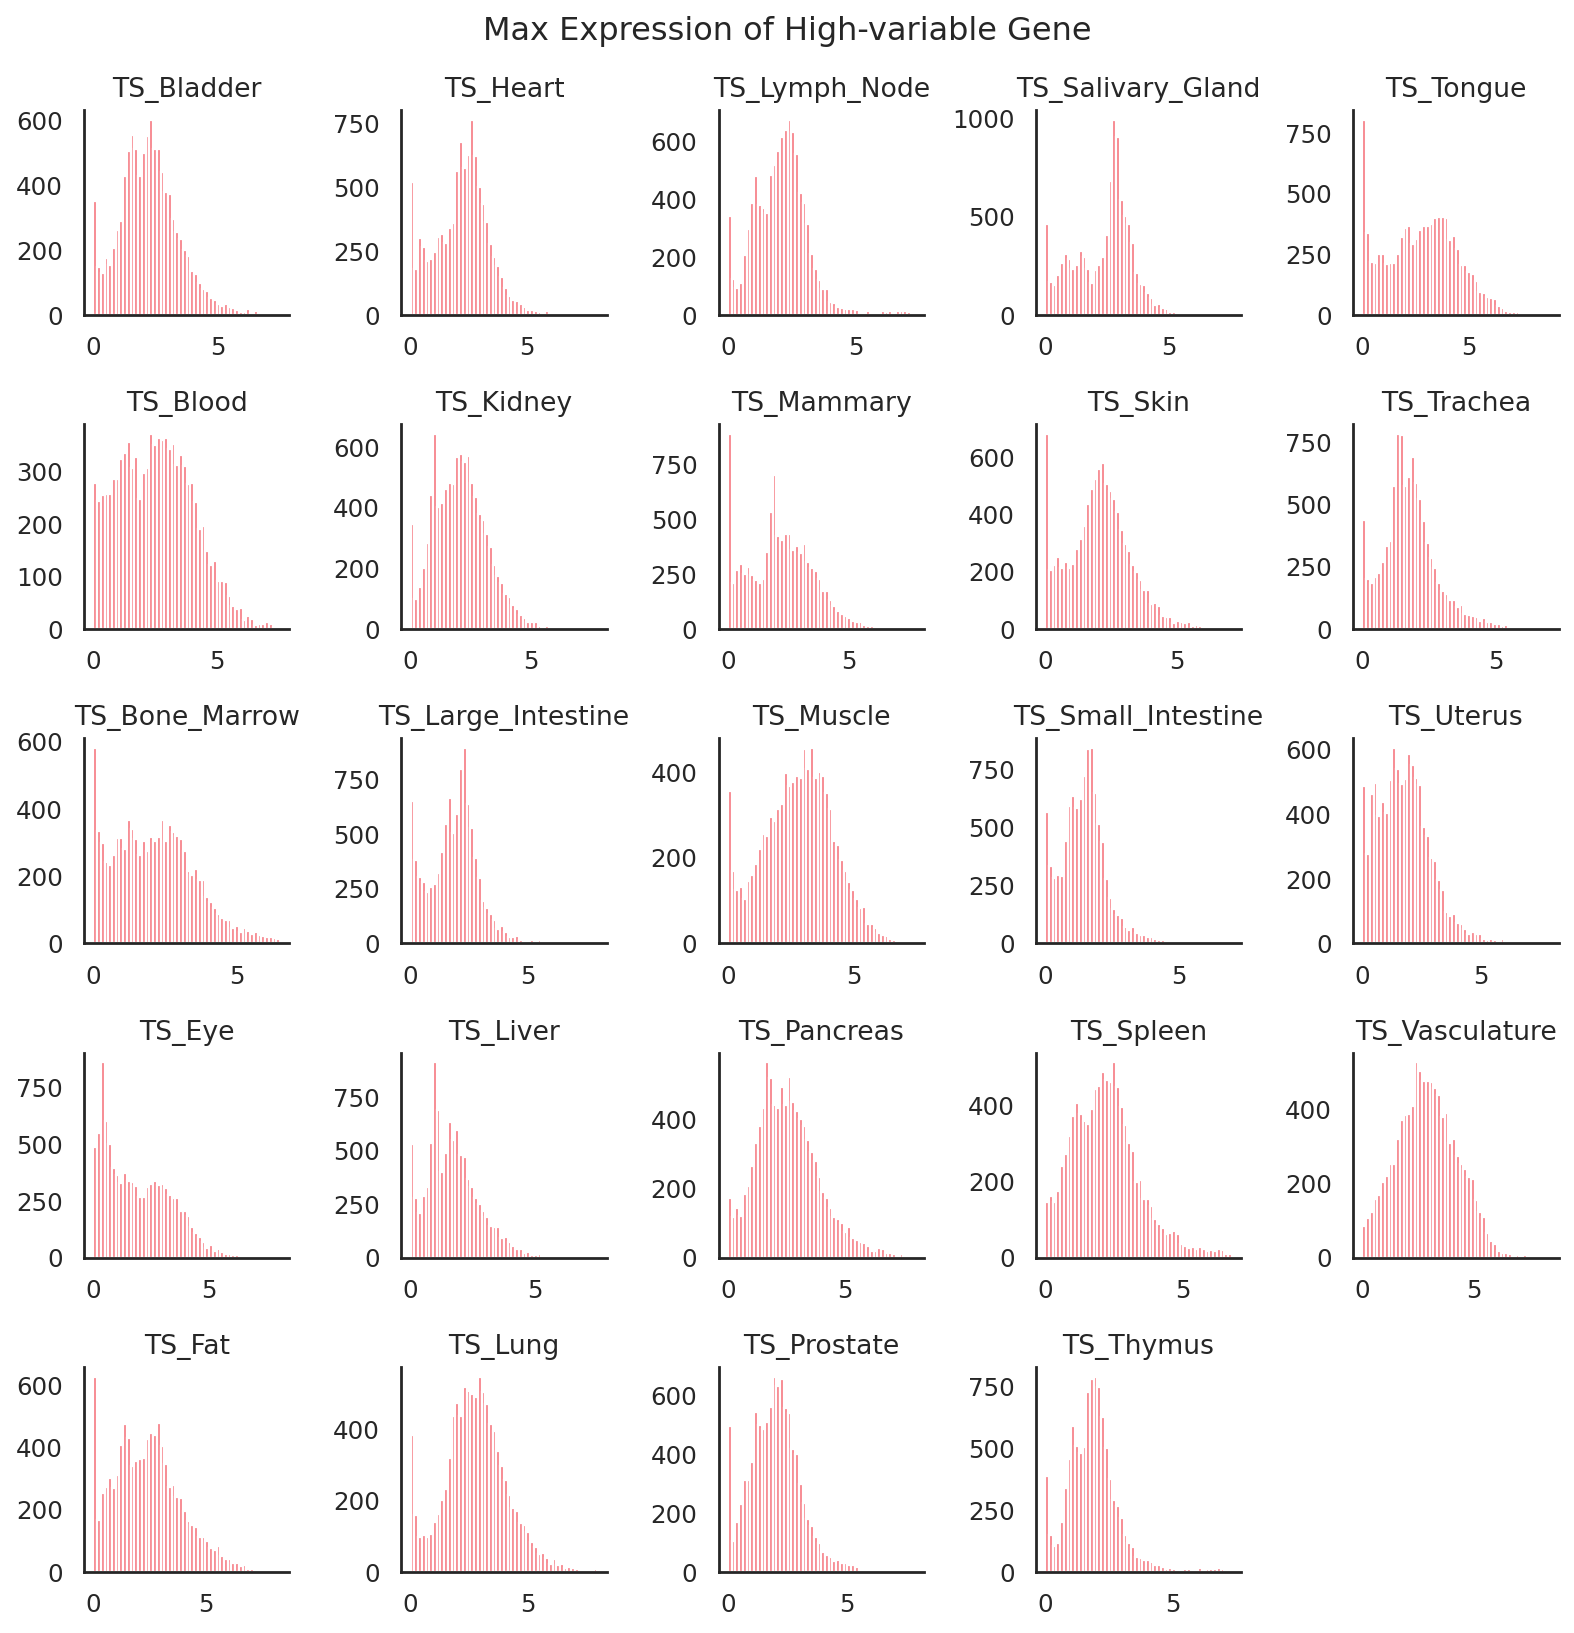

In [106]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
pp=plt.figure(figsize=(10,10))
#用ax控制图片
i=0
for k2 in range(5):
    for k1 in range(5):
        if k2==4 and k1==4:
            break
        ax=pp.add_subplot(5,5,k1*5+k2+1)
        plt.hist(human_max[name_ret[i]],color=colors[-1],bins=50)
        plt.title(name_ret[i])
        i+=1
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(True)
        ax.spines['left'].set_visible(True)
plt.tight_layout()
plt.suptitle('Max Expression of High-variable Gene',y=1.02) 
plt.savefig("figures1/sFig1_max.png",dpi=300,bbox_inches = 'tight')

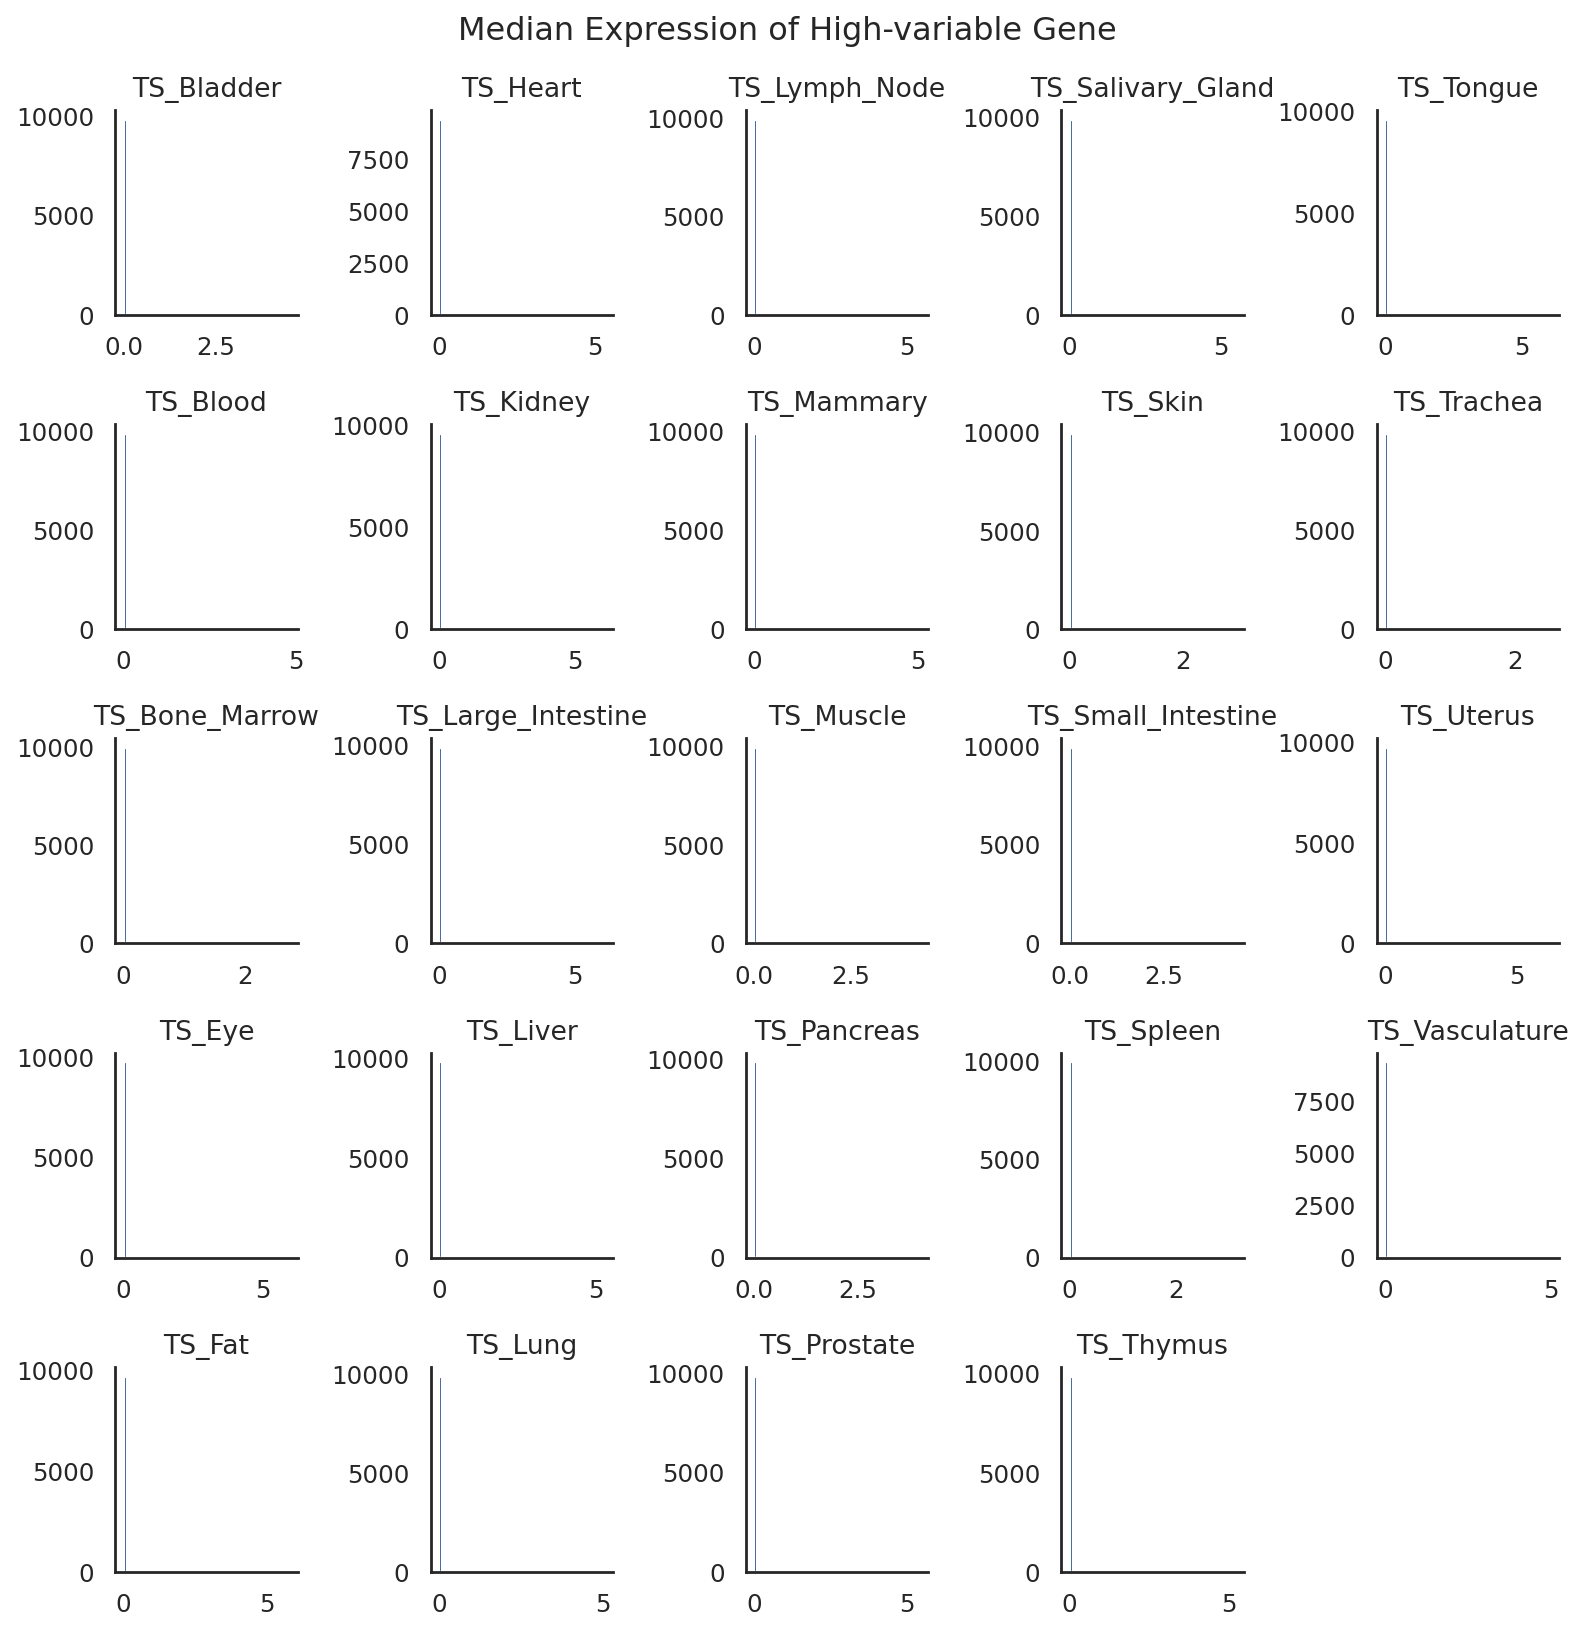

In [105]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
pp=plt.figure(figsize=(10,10))
#用ax控制图片
i=0
for k2 in range(5):
    for k1 in range(5):
        if k2==4 and k1==4:
            break
        ax=pp.add_subplot(5,5,k1*5+k2+1)
        
        plt.hist(human_median[name_ret[i]],color='#174785',bins=50)
        plt.title(name_ret[i])
        i+=1
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(True)
        ax.spines['left'].set_visible(True)
        #ax.set_xlim(0,1)
plt.tight_layout()
plt.suptitle('Median Expression of High-variable Gene',y=1.02) 
plt.savefig("figures1/sFig1_median.png",dpi=300,bbox_inches = 'tight')

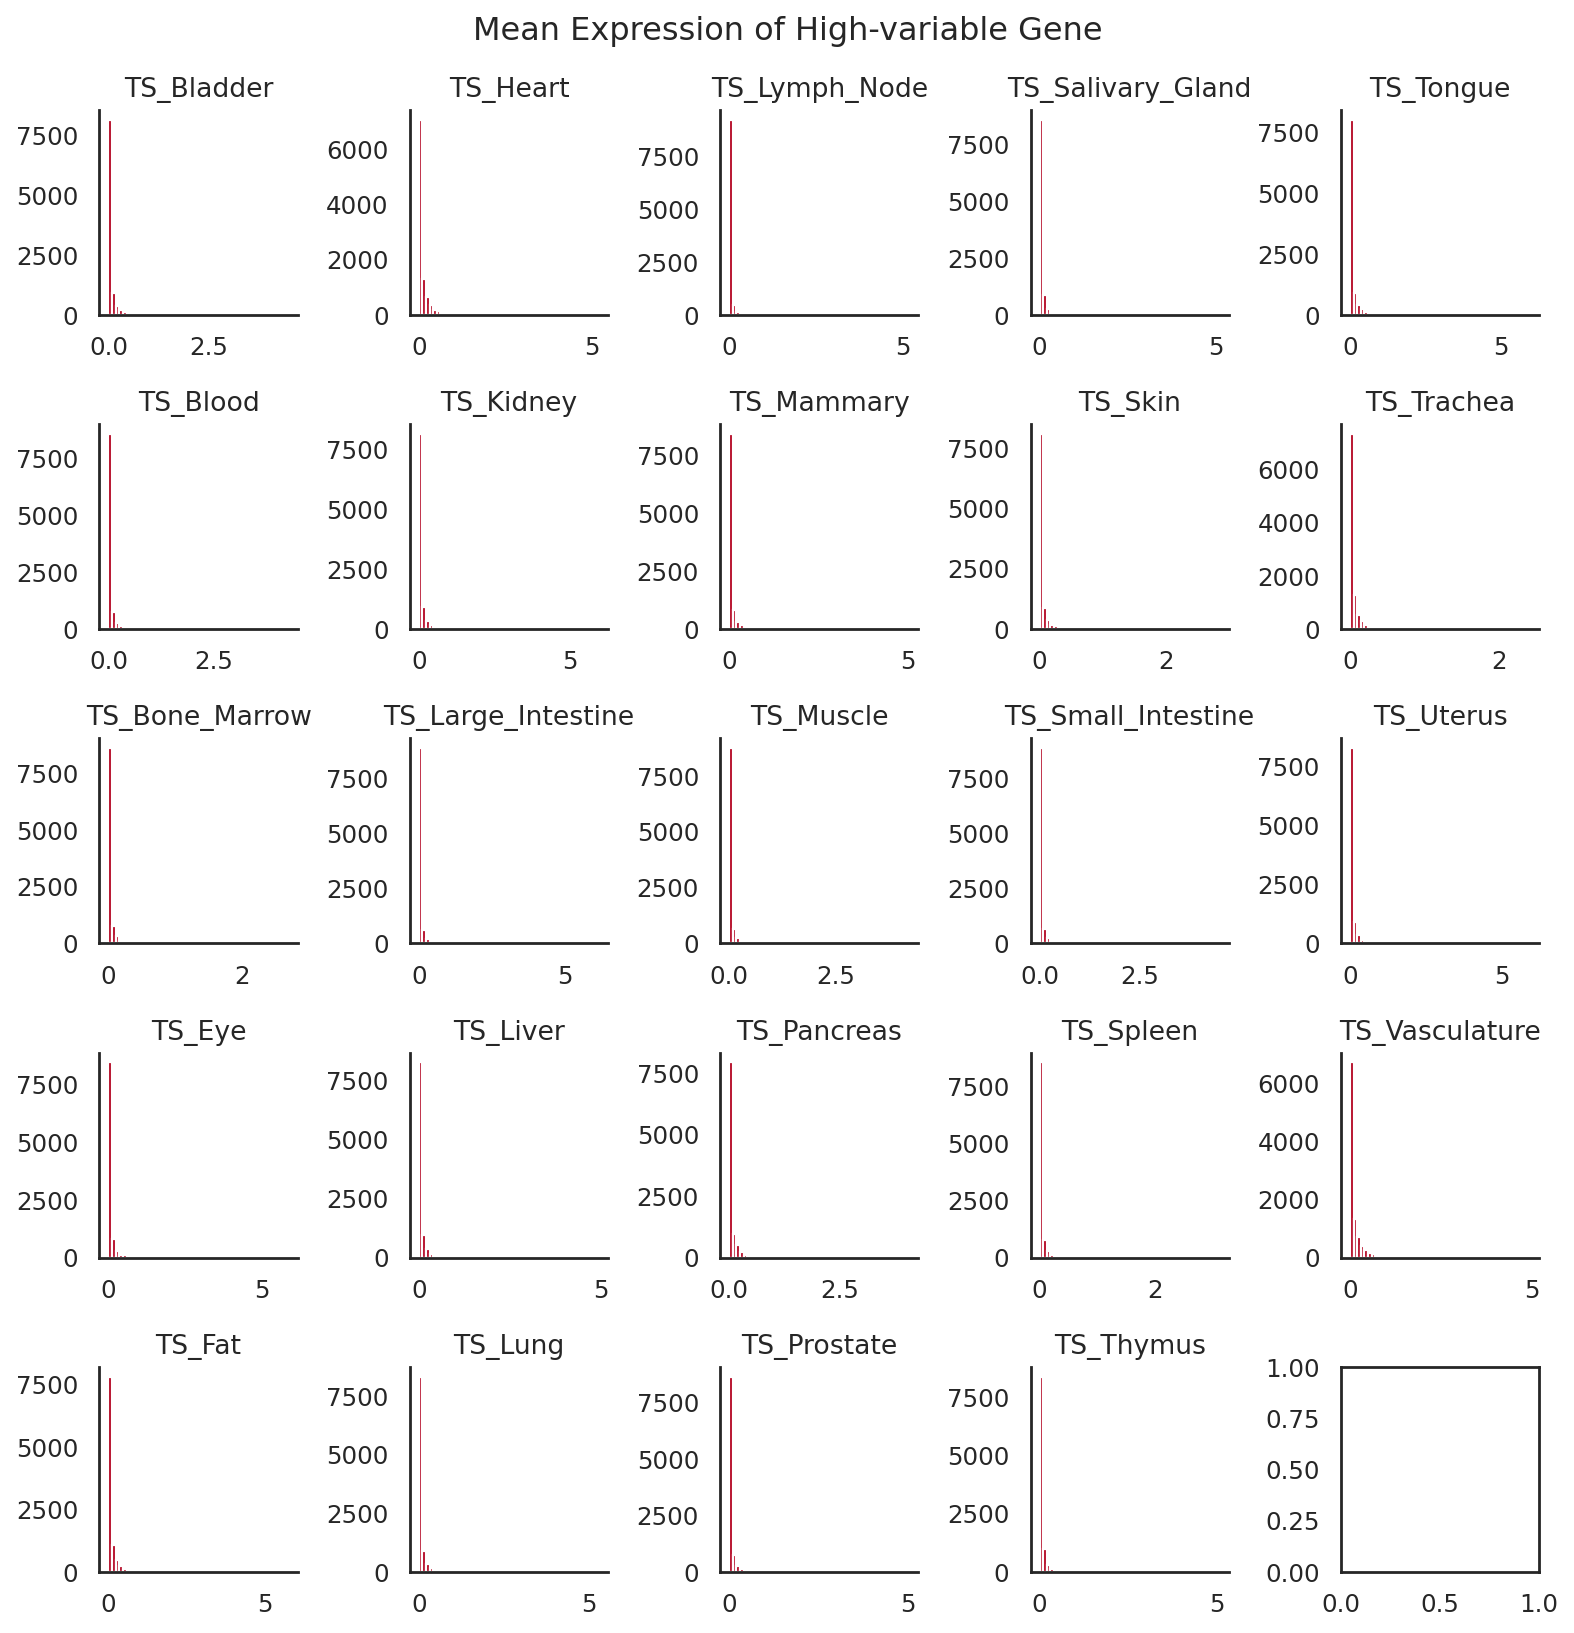

In [103]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
pp=plt.figure(figsize=(10,10))
#用ax控制图片
i=0
for k2 in range(5):
  for k1 in range(5):
    ax=pp.add_subplot(5,5,k1*5+k2+1)
    if k2==4 and k1==4:
        break
    plt.hist(human_mean[name_ret[i]],color='#b2011e',bins=50)
    plt.title(name_ret[i])
    i+=1
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
plt.tight_layout()
plt.suptitle('Mean Expression of High-variable Gene',y=1.02) 
plt.savefig("figures1/sFig1_mean.png",dpi=300,bbox_inches = 'tight')

In [68]:
from scipy import stats
mu =np.mean(human_max[name_ret[i]]) #计算均值 
sigma =np.std(human_max[name_ret[i]])
count, bins=np.histogram(human_max[name_ret[i]],bins=100)
y = stats.norm.pdf(bins, mu, sigma)
y.shape

(101,)

In [69]:
from scipy import stats
mu =np.mean(human_max[name_ret[i-1]]) #计算均值 
sigma =np.std(human_max[name_ret[i-1]])
count, bins=np.histogram(human_max[name_ret[i-1]],bins=100)
y1 = stats.norm.pdf(bins, mu, sigma)
y1.shape

(101,)

In [70]:
stats.spearmanr(y,y1)

SpearmanrResult(correlation=0.6987652882935352, pvalue=4.484327894094317e-16)

In [74]:
from scipy import stats
human_max_pd=pd.DataFrame(index=human_max.keys())
for i in human_max.keys():
    human_max_test=[]
    mu_i=np.mean(human_max[i])
    sigma_i=np.std(human_max[i])
    count_i,bins_i=np.histogram(human_max[i],bins=100)
    y_i=stats.norm.pdf(bins_i, mu_i, sigma_i)
    for j in human_max.keys():
        mu_j=np.mean(human_max[j])
        sigma_j=np.std(human_max[j])
        count_j,bins_j=np.histogram(human_max[j],bins=100)
        y_j=stats.norm.pdf(bins_j, mu_j, sigma_j)
        human_max_test.append(stats.spearmanr(y_i,y_j)[0])
    human_max_pd[i]=human_max_test
human_max_pd.head()

,TS_Bladder,TS_Blood,TS_Bone_Marrow,TS_Eye,TS_Fat,TS_Heart,TS_Kidney,TS_Large_Intestine,TS_Liver,TS_Lung,...,TS_Prostate,TS_Salivary_Gland,TS_Skin,TS_Small_Intestine,TS_Spleen,TS_Thymus,TS_Tongue,TS_Trachea,TS_Uterus,TS_Vasculature
TS_Bladder,1.000000,0.982446,0.991043,0.958486,0.998614,0.991776,0.984450,0.945778,0.939068,0.970984,...,0.970006,0.998567,0.998614,0.917915,0.991043,0.975236,0.998567,0.975236,0.939068,0.970984
TS_Blood,0.982446,1.000000,0.998451,0.895923,0.971928,0.952615,0.937787,0.877997,0.868923,0.998404,...,0.913314,0.990751,0.971928,0.841654,0.998451,0.921724,0.990751,0.921724,0.868923,0.998404
TS_Bone_Marrow,0.991043,0.998451,1.000000,0.916680,0.983017,0.967094,0.954292,0.900128,0.891672,0.993803,...,0.932510,0.996669,0.983017,0.865976,1.000000,0.940070,0.996669,0.940070,0.891672,0.993803
TS_Eye,0.958486,0.895923,0.916680,1.000000,0.971171,0.985871,0.992790,0.998893,0.997566,0.872860,...,0.998847,0.943494,0.971171,0.990879,0.916680,0.997402,0.943494,0.997402,0.997566,0.872860
TS_Fat,0.998614,0.971928,0.983017,0.971171,1.000000,0.997041,0.992068,0.960163,0.954234,0.958066,...,0.980804,0.994455,1.000000,0.935143,0.983017,0.985020,0.994455,0.985020,0.954234,0.958066


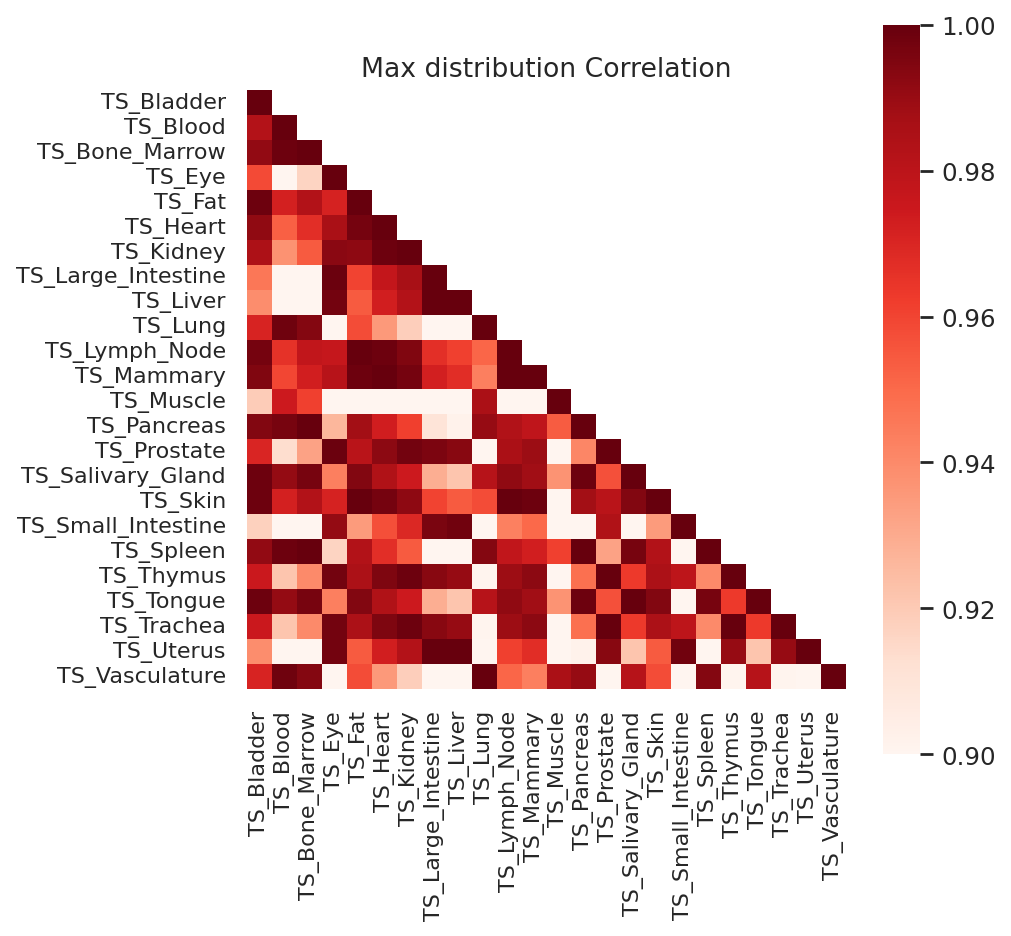

In [154]:
fig, ax = plt.subplots(figsize=(6,6))
mask = np.array(human_max_pd)
mask[np.tril_indices_from(mask)] = False #下三角
sns.heatmap(human_max_pd,cmap='Reds',mask=mask,yticklabels=True,xticklabels=True,
           square=True,annot=False,ax=ax,vmax=1, vmin=0.9,)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title('Max distribution Correlation',fontsize=12)
fig.savefig("figures1/fig_max_cor.png",dpi=300,bbox_inches = 'tight')

In [79]:
from scipy import stats
human_median_pd=pd.DataFrame(index=human_median.keys())
for i in human_median.keys():
    human_median_test=[]
    mu_i=np.mean(human_median[i])
    sigma_i=np.std(human_median[i])
    count_i,bins_i=np.histogram(human_median[i],bins=100)
    y_i=stats.norm.pdf(bins_i, mu_i, sigma_i)
    for j in human_median.keys():
        mu_j=np.mean(human_median[j])
        sigma_j=np.std(human_median[j])
        count_j,bins_j=np.histogram(human_median[j],bins=100)
        y_j=stats.norm.pdf(bins_j, mu_j, sigma_j)
        human_median_test.append(stats.spearmanr(y_i,y_j)[0])
    human_median_pd[i]=human_median_test
human_median_pd.head()

,TS_Bladder,TS_Blood,TS_Bone_Marrow,TS_Eye,TS_Fat,TS_Heart,TS_Kidney,TS_Large_Intestine,TS_Liver,TS_Lung,...,TS_Prostate,TS_Salivary_Gland,TS_Skin,TS_Small_Intestine,TS_Spleen,TS_Thymus,TS_Tongue,TS_Trachea,TS_Uterus,TS_Vasculature
TS_Bladder,1.000000,1.000000,0.985450,1.000000,0.999988,0.999988,0.999988,1.000000,1.000000,0.999988,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999988,1.000000,1.000000,0.999965
TS_Blood,1.000000,1.000000,0.985450,1.000000,0.999988,0.999988,0.999988,1.000000,1.000000,0.999988,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999988,1.000000,1.000000,0.999965
TS_Bone_Marrow,0.985450,0.985450,1.000000,0.985450,0.985439,0.985439,0.985439,0.985450,0.985450,0.985462,...,0.985450,0.985450,0.985450,0.985450,0.985450,0.985450,0.985439,0.985450,0.985450,0.985415
TS_Eye,1.000000,1.000000,0.985450,1.000000,0.999988,0.999988,0.999988,1.000000,1.000000,0.999988,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999988,1.000000,1.000000,0.999965
TS_Fat,0.999988,0.999988,0.985439,0.999988,1.000000,1.000000,1.000000,0.999988,0.999988,0.999977,...,0.999988,0.999988,0.999988,0.999988,0.999988,0.999988,1.000000,0.999988,0.999988,0.999988


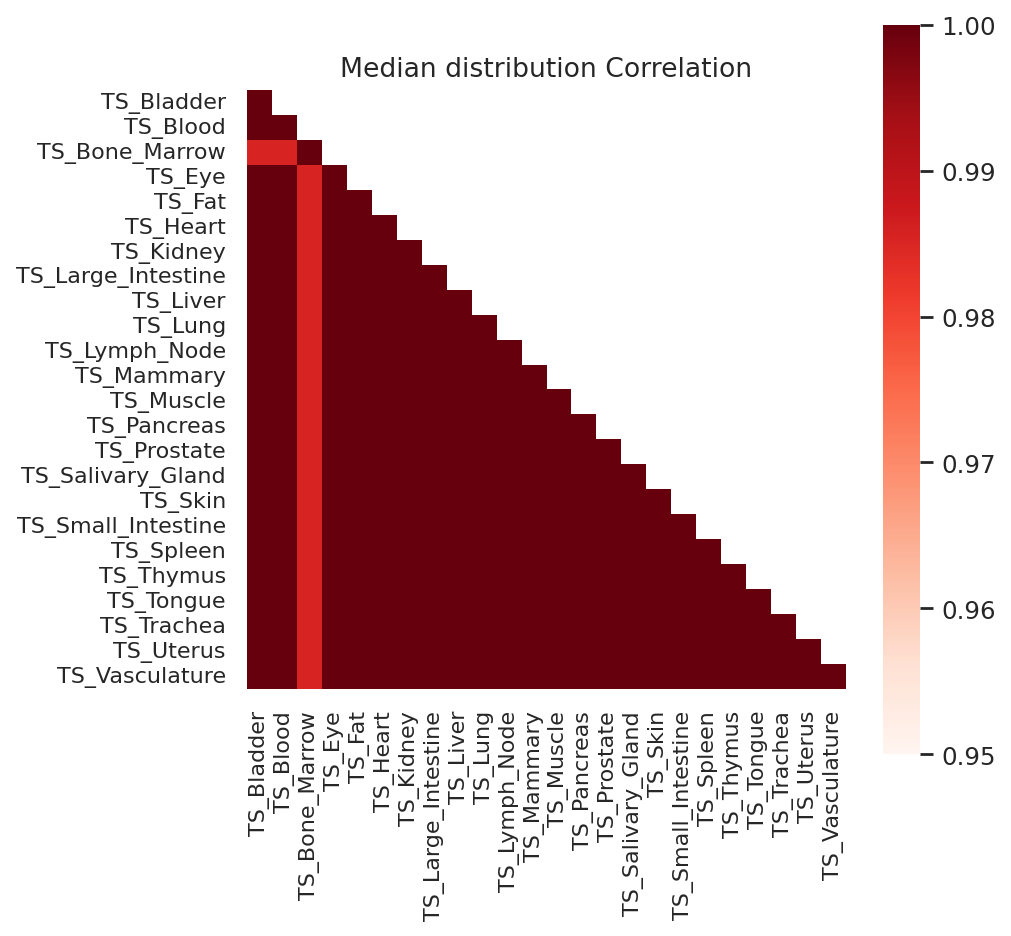

In [155]:
fig, ax = plt.subplots(figsize=(6,6))
mask = np.array(human_median_pd)
mask[np.tril_indices_from(mask)] = False #下三角
sns.heatmap(human_median_pd,cmap='Reds',mask=mask,yticklabels=True,xticklabels=True,
           square=True,annot=False,ax=ax,vmax=1, vmin=0.95,)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title('Median distribution Correlation',fontsize=12)
fig.savefig("figures1/fig_median_cor.png",dpi=300,bbox_inches = 'tight')

In [82]:
from scipy import stats
human_mean_pd=pd.DataFrame(index=human_mean.keys())
for i in human_mean.keys():
    human_mean_test=[]
    mu_i=np.mean(human_mean[i])
    sigma_i=np.std(human_mean[i])
    count_i,bins_i=np.histogram(human_mean[i],bins=100)
    y_i=stats.norm.pdf(bins_i, mu_i, sigma_i)
    for j in human_mean.keys():
        mu_j=np.mean(human_mean[j])
        sigma_j=np.std(human_mean[j])
        count_j,bins_j=np.histogram(human_mean[j],bins=100)
        y_j=stats.norm.pdf(bins_j, mu_j, sigma_j)
        human_mean_test.append(stats.spearmanr(y_i,y_j)[0])
    human_mean_pd[i]=human_mean_test
human_mean_pd.head()

,TS_Bladder,TS_Blood,TS_Bone_Marrow,TS_Eye,TS_Fat,TS_Heart,TS_Kidney,TS_Large_Intestine,TS_Liver,TS_Lung,...,TS_Prostate,TS_Salivary_Gland,TS_Skin,TS_Small_Intestine,TS_Spleen,TS_Thymus,TS_Tongue,TS_Trachea,TS_Uterus,TS_Vasculature
TS_Bladder,1.000000,1.000000,0.999988,1.000000,0.999977,0.999918,0.999977,0.999988,1.000000,1.000000,...,1.000000,1.000000,0.999977,0.999988,1.000000,1.000000,0.999977,0.999918,1.000000,0.999814
TS_Blood,1.000000,1.000000,0.999988,1.000000,0.999977,0.999918,0.999977,0.999988,1.000000,1.000000,...,1.000000,1.000000,0.999977,0.999988,1.000000,1.000000,0.999977,0.999918,1.000000,0.999814
TS_Bone_Marrow,0.999988,0.999988,1.000000,0.999988,0.999942,0.999872,0.999942,1.000000,0.999988,0.999988,...,0.999988,0.999988,0.999942,1.000000,0.999988,0.999988,0.999942,0.999872,0.999988,0.999767
TS_Eye,1.000000,1.000000,0.999988,1.000000,0.999977,0.999918,0.999977,0.999988,1.000000,1.000000,...,1.000000,1.000000,0.999977,0.999988,1.000000,1.000000,0.999977,0.999918,1.000000,0.999814
TS_Fat,0.999977,0.999977,0.999942,0.999977,1.000000,0.999977,1.000000,0.999942,0.999977,0.999977,...,0.999977,0.999977,1.000000,0.999942,0.999977,0.999977,1.000000,0.999977,0.999977,0.999895


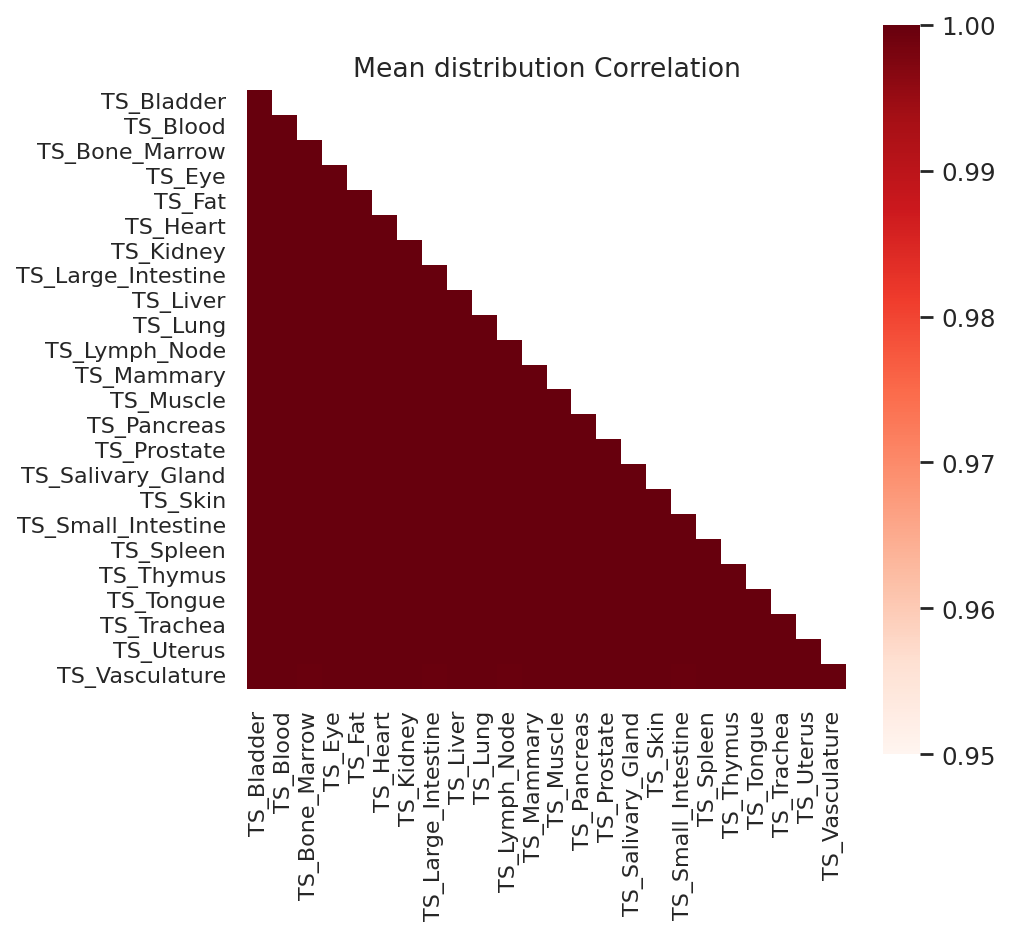

In [156]:
fig, ax = plt.subplots(figsize=(6,6))
mask = np.array(human_mean_pd)
mask[np.tril_indices_from(mask)] = False #下三角
sns.heatmap(human_mean_pd,cmap='Reds',mask=mask,yticklabels=True,xticklabels=True,
           square=True,annot=False,ax=ax,vmax=1, vmin=0.95,)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title('Mean distribution Correlation',fontsize=12)
fig.savefig("figures1/fig_mean_cor.png",dpi=300,bbox_inches = 'tight')

In [84]:
from scipy import stats
human_std_pd=pd.DataFrame(index=human_std.keys())
for i in human_std.keys():
    human_std_test=[]
    mu_i=np.mean(human_std[i])
    sigma_i=np.std(human_std[i])
    count_i,bins_i=np.histogram(human_std[i],bins=100)
    y_i=stats.norm.pdf(bins_i, mu_i, sigma_i)
    for j in human_std.keys():
        mu_j=np.mean(human_std[j])
        sigma_j=np.std(human_std[j])
        count_j,bins_j=np.histogram(human_std[j],bins=100)
        y_j=stats.norm.pdf(bins_j, mu_j, sigma_j)
        human_std_test.append(stats.spearmanr(y_i,y_j)[0])
    human_std_pd[i]=human_std_test
human_std_pd.head()

,TS_Bladder,TS_Blood,TS_Bone_Marrow,TS_Eye,TS_Fat,TS_Heart,TS_Kidney,TS_Large_Intestine,TS_Liver,TS_Lung,...,TS_Prostate,TS_Salivary_Gland,TS_Skin,TS_Small_Intestine,TS_Spleen,TS_Thymus,TS_Tongue,TS_Trachea,TS_Uterus,TS_Vasculature
TS_Bladder,1.000000,0.998008,0.999348,0.999907,0.998556,0.995574,0.999185,0.998556,0.999639,0.999685,...,0.998928,0.999639,0.999907,0.999639,0.999918,0.998556,0.999185,0.999907,0.999185,0.997740
TS_Blood,0.998008,1.000000,0.999499,0.997286,0.994467,0.990612,0.995515,0.994467,0.996459,0.999115,...,0.999779,0.996459,0.997286,0.996459,0.998614,0.994467,0.995515,0.997286,0.995515,0.993302
TS_Bone_Marrow,0.999348,0.999499,1.000000,0.998835,0.996436,0.992720,0.997379,0.996436,0.998183,0.999930,...,0.999930,0.998183,0.998835,0.998183,0.999709,0.996436,0.997379,0.998835,0.997379,0.995341
TS_Eye,0.999907,0.997286,0.998835,1.000000,0.999138,0.996540,0.999616,0.999138,0.999907,0.999289,...,0.998323,0.999907,1.000000,0.999907,0.999662,0.999138,0.999616,1.000000,0.999616,0.998462
TS_Fat,0.998556,0.994467,0.996436,0.999138,1.000000,0.998975,0.999895,1.000000,0.999592,0.997169,...,0.995713,0.999592,0.999138,0.999592,0.997892,1.000000,0.999895,0.999138,0.999895,0.999884


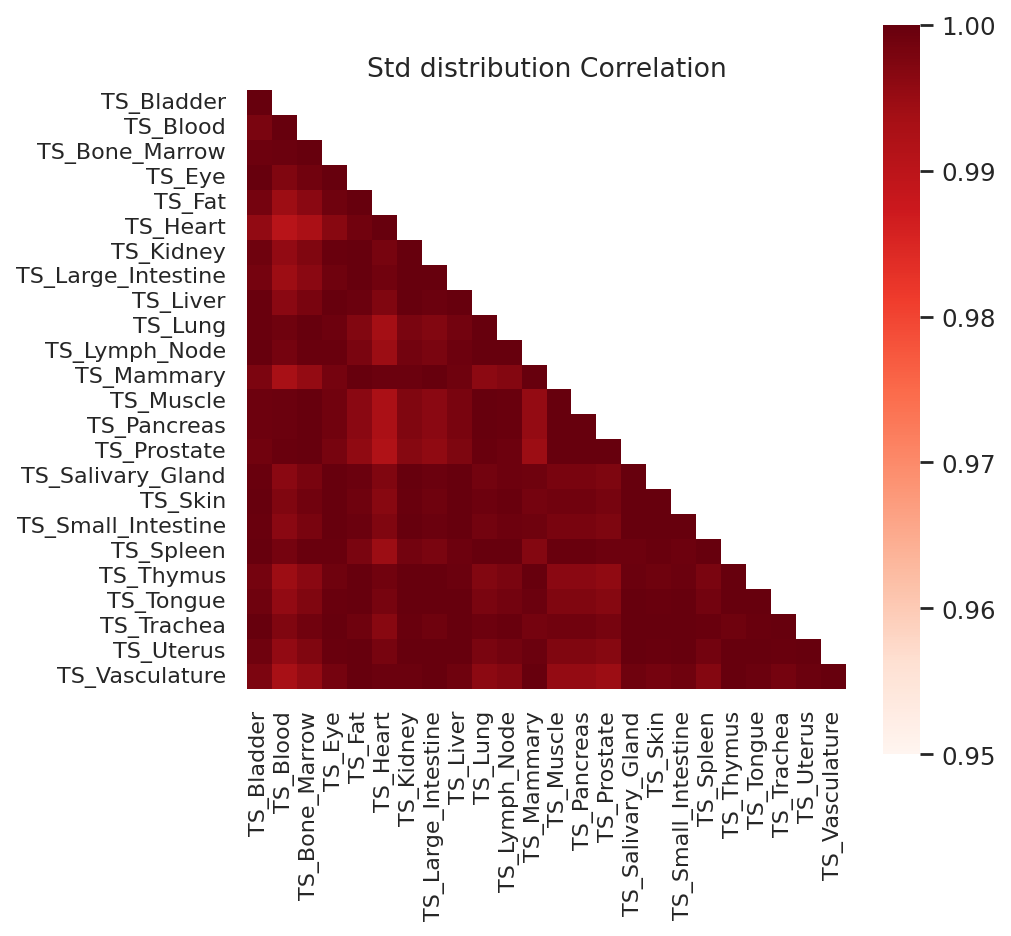

In [157]:
fig, ax = plt.subplots(figsize=(6,6))
mask = np.array(human_std_pd)
mask[np.tril_indices_from(mask)] = False #下三角
sns.heatmap(human_std_pd,cmap='Reds',mask=mask,yticklabels=True,xticklabels=True,
           square=True,annot=False,ax=ax,vmax=1, vmin=0.95,)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.title('Std distribution Correlation',fontsize=12)
fig.savefig("figures1/fig_std_cor.png",dpi=300,bbox_inches = 'tight')

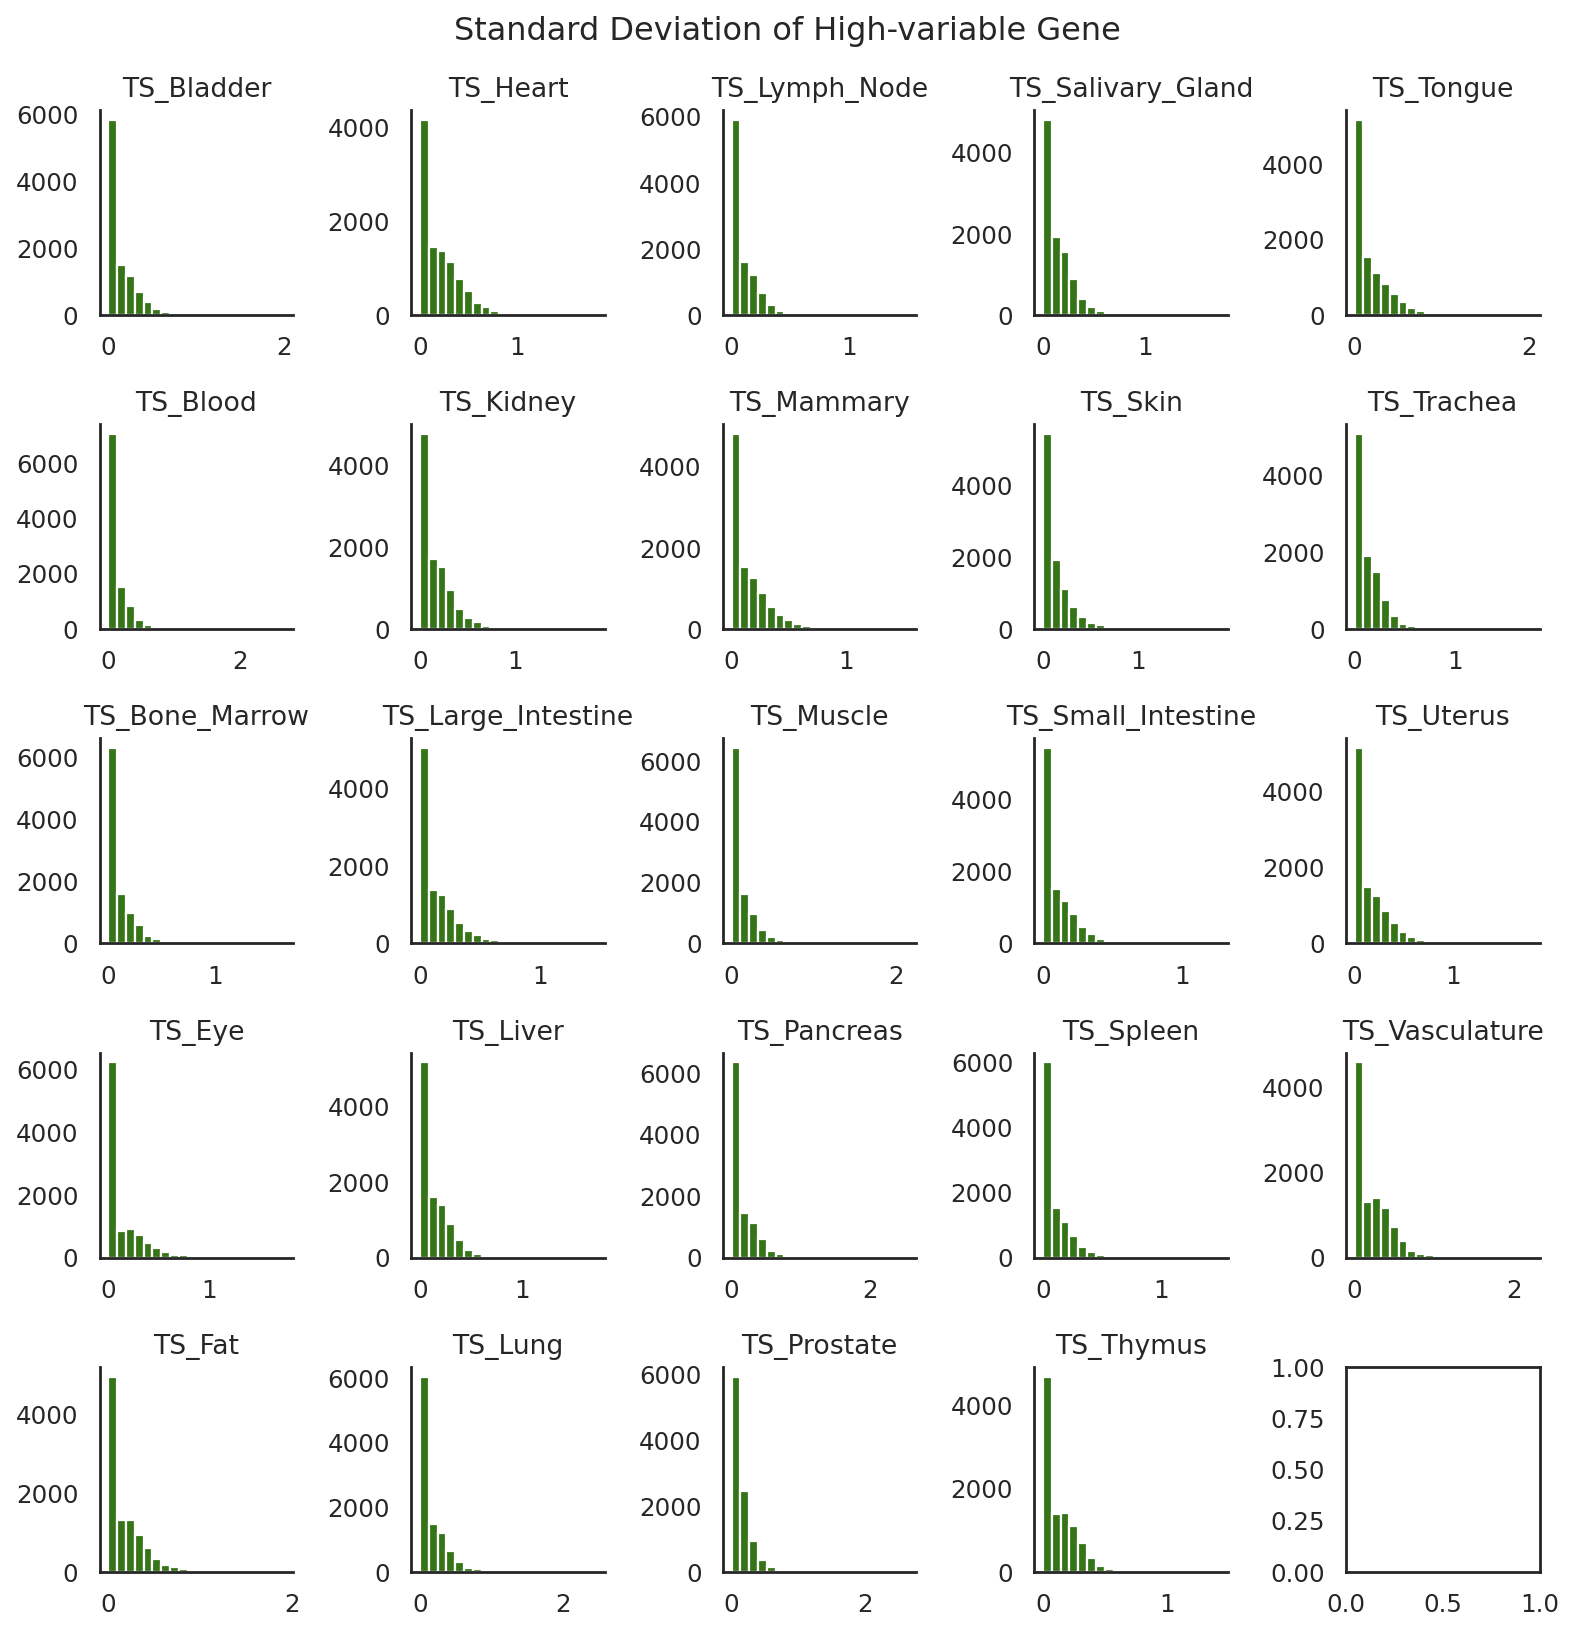

In [102]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
pp=plt.figure(figsize=(10,10))
#用ax控制图片
i=0
for k2 in range(5):
  for k1 in range(5):
    ax=pp.add_subplot(5,5,k1*5+k2+1)
    if k2==4 and k1==4:
        break
    plt.hist(human_std[list(human_std.keys())[i]],color='#357517',bins=20)
    plt.title(list(human_std.keys())[i])
    i+=1
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
plt.tight_layout()
plt.suptitle('Standard Deviation of High-variable Gene',y=1.02) 
plt.savefig("figures1/sFig1_std.png",dpi=300,bbox_inches = 'tight')

/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


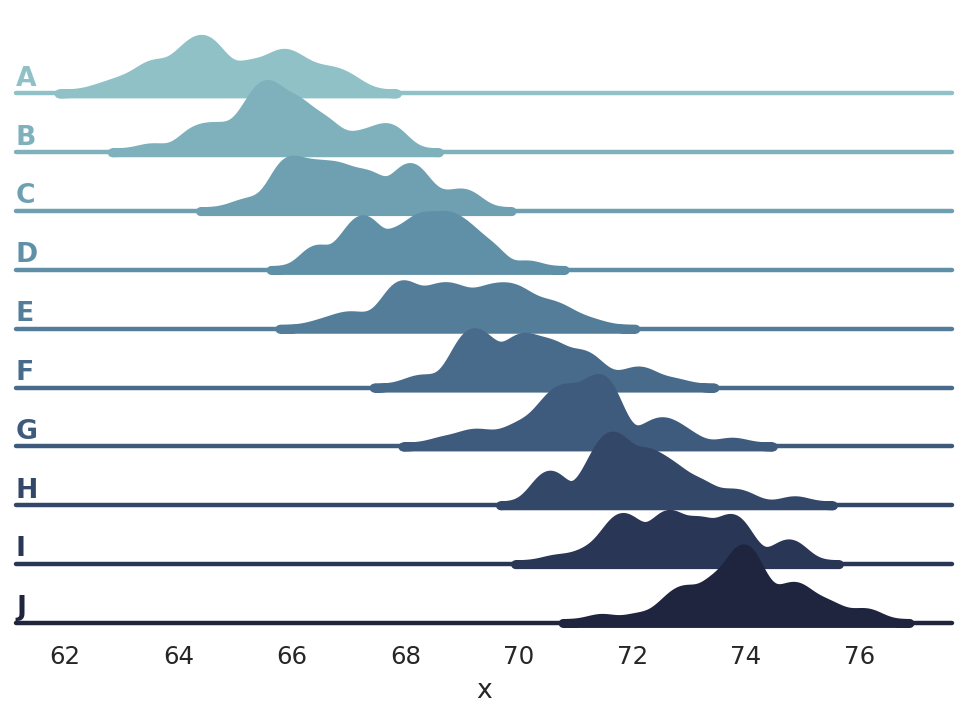

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=4)
#g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

In [23]:
df.g.map(ord).head(15)

0     65
1     66
2     67
3     68
4     69
5     70
6     71
7     72
8     73
9     74
10    65
11    66
12    67
13    68
14    69
Name: g, dtype: int64

In [ ]:
np.tile(list("ABCDEFGHIJ"), 50)

In [58]:
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))

In [55]:
df.head()

,x,g
0,-0.961877,A
1,0.147050,B
2,-0.629989,C
3,0.791019,D
4,1.583534,E


In [25]:
df=pd.DataFrame(columns=['x','g'])
k=65
for i in human_max.keys():
  df1=pd.DataFrame()
  df1['x']=human_max[i]
  df1['g']=[j for j in [i]*len(df1)]
  df1['x1']=[j for j in [k]*len(df1)]
  df1['x']=df1['x']+df1['x1']
  del df1['x1']
  df=pd.concat([df,df1])
  k+=1

df


,x,g
0,71.150597,TS_Bladder
1,68.906089,TS_Bladder
2,67.525124,TS_Bladder
3,69.390774,TS_Bladder
4,66.154120,TS_Bladder
...,...,...
9995,94.937206,TabulaSapiens
9996,93.074097,TabulaSapiens
9997,92.287682,TabulaSapiens
9998,92.116911,TabulaSapiens


In [80]:
df.to_csv('plot_std.csv')

/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


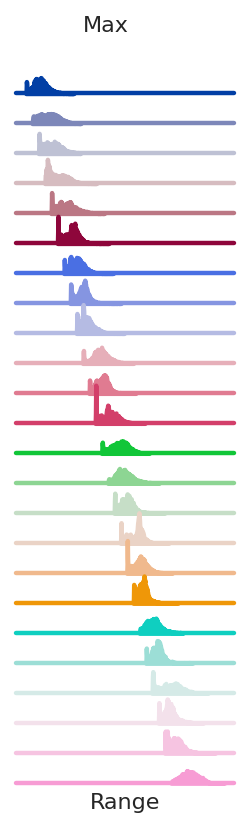

In [144]:
df=pd.DataFrame(columns=['x','g'])
k=65
for i in human_max.keys():
  df1=pd.DataFrame()
  df1['x']=human_max[i]
  df1['g']=[j for j in [i]*len(df1)]
  df1['x1']=[j for j in [k]*len(df1)]
  df1['x']=df1['x']+df1['x1']
  del df1['x1']
  df=pd.concat([df,df1])
  k+=1

#pp=plt.figure(figsize=(5,20))
# Initialize the FacetGrid object
#ax=pp.add_subplot(1,1,1)
#sns.set(rc={'figure.figsize':(5,20)})
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=7, height=.25, palette=sc.pl.palettes.zeileis_28)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.1, clip_on=False,
      fill=True, alpha=1, linewidth=2)
#g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


#g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.set(xticks=[],xlabel="",)
plt.xlabel('Range',fontsize=10)
g.despine(bottom=True, left=True)
plt.suptitle('Max',fontsize=10,y=0.95) 
plt.savefig("figures1/Fig1_max.png",dpi=300,bbox_inches = 'tight')

In [116]:
help(g.set)

Help on method set in module seaborn.axisgrid:

set(**kwargs) method of seaborn.axisgrid.FacetGrid instance
    Set attributes on each subplot Axes.



/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


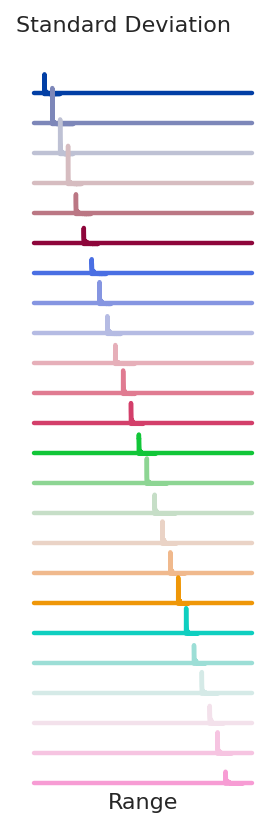

In [145]:
df=pd.DataFrame(columns=['x','g'])
k=65
for i in human_std.keys():
  df1=pd.DataFrame()
  df1['x']=human_std[i]
  df1['g']=[j for j in [i]*len(df1)]
  df1['x1']=[j for j in [k]*len(df1)]
  df1['x']=df1['x']+df1['x1']
  del df1['x1']
  df=pd.concat([df,df1])
  k+=1

#pp=plt.figure(figsize=(5,20))
# Initialize the FacetGrid object
#ax=pp.add_subplot(1,1,1)
#sns.set(rc={'figure.figsize':(5,20)})
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=7, height=.25, palette=sc.pl.palettes.zeileis_28)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.1, clip_on=False,
      fill=True, alpha=1, linewidth=2)
#g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


#g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.set(xticks=[],xlabel="",)
plt.xlabel('Range',fontsize=10)
g.despine(bottom=True, left=True)
plt.suptitle('Standard Deviation',fontsize=10,y=0.95) 
plt.savefig("figures1/Fig1_std.png",dpi=300,bbox_inches = 'tight')

/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


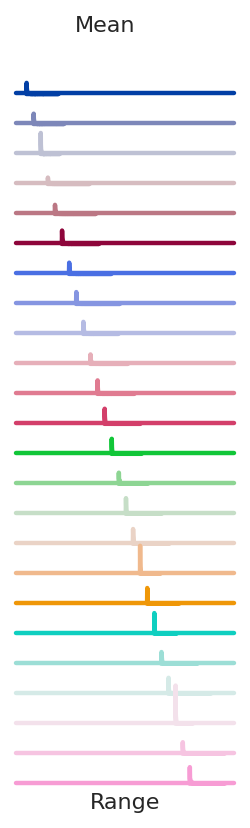

In [146]:
df=pd.DataFrame(columns=['x','g'])
k=65
for i in human_mean.keys():
  df1=pd.DataFrame()
  df1['x']=human_mean[i]
  df1['g']=[j for j in [i]*len(df1)]
  df1['x1']=[j for j in [k]*len(df1)]
  df1['x']=df1['x']+df1['x1']
  del df1['x1']
  df=pd.concat([df,df1])
  k+=1

#pp=plt.figure(figsize=(5,20))
# Initialize the FacetGrid object
#ax=pp.add_subplot(1,1,1)
#sns.set(rc={'figure.figsize':(5,20)})
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=7, height=.25, palette=sc.pl.palettes.zeileis_28)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.1, clip_on=False,
      fill=True, alpha=1, linewidth=2)
#g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


#g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
g.set(xticks=[],xlabel="",)
plt.xlabel('Range',fontsize=10)
g.despine(bottom=True, left=True)
plt.suptitle('Mean',fontsize=10,y=0.95) 
#plt.suptitle('Mean',y=1) 
plt.savefig("figures1/Fig1_mean.png",dpi=300,bbox_inches = 'tight')

/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/home/xiongyy/miniconda3/envs/bio/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


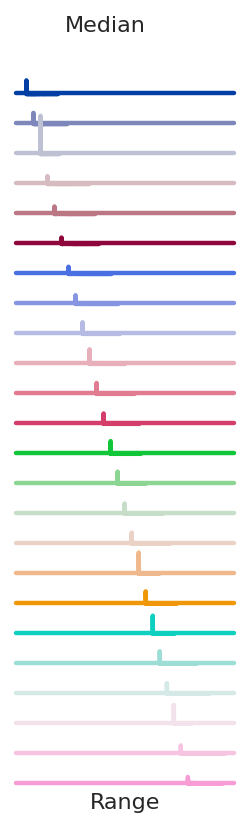

In [147]:
df=pd.DataFrame(columns=['x','g'])
k=65
for i in human_median.keys():
  df1=pd.DataFrame()
  df1['x']=human_median[i]
  df1['g']=[j for j in [i]*len(df1)]
  df1['x1']=[j for j in [k]*len(df1)]
  df1['x']=df1['x']+df1['x1']
  del df1['x1']
  df=pd.concat([df,df1])
  k+=1

#pp=plt.figure(figsize=(5,20))
# Initialize the FacetGrid object
#ax=pp.add_subplot(1,1,1)
#sns.set(rc={'figure.figsize':(5,20)})
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=7, height=.25, palette=sc.pl.palettes.zeileis_28)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.1, clip_on=False,
      fill=True, alpha=1, linewidth=2)
#g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


#g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
g.set(xticks=[],xlabel="",)
plt.xlabel('Range',fontsize=10)
g.despine(bottom=True, left=True)
plt.suptitle('Median',fontsize=10,y=0.95) 
plt.savefig("figures1/Fig1_median.png",dpi=300,bbox_inches = 'tight')

In [131]:
#绘图参数设置
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

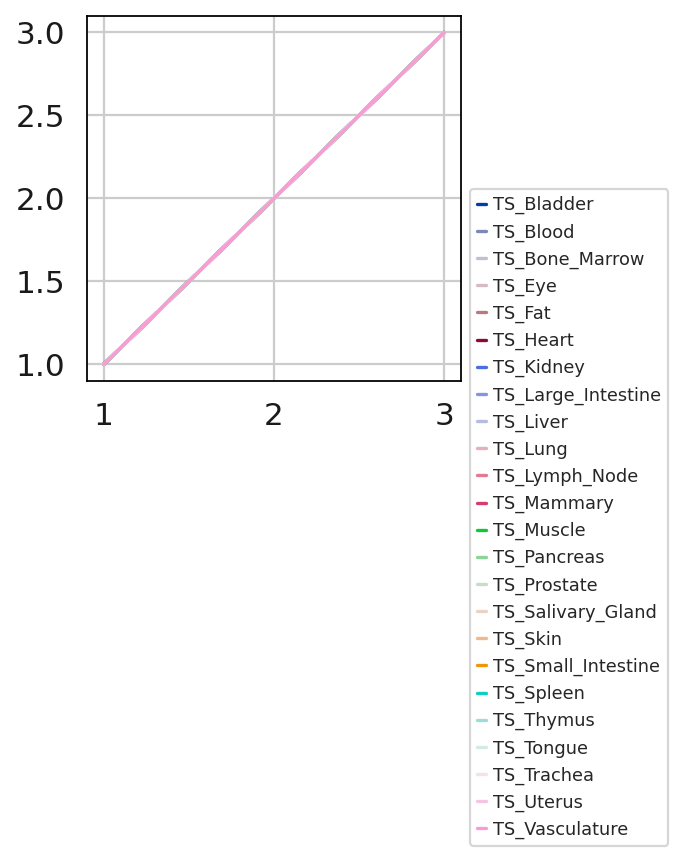

In [132]:
fig, ax = plt.subplots(figsize=(3,3))
for i,j in zip(human_median.keys(),sc.pl.palettes.zeileis_28):
    ax.plot([1,2,3],[1,2,3],label=i,color=j)
ax.legend(bbox_to_anchor=(1, 0.55), ncol=1,fontsize=8)
fig.savefig("figures1/fig_legend.png",dpi=300,bbox_inches = 'tight')

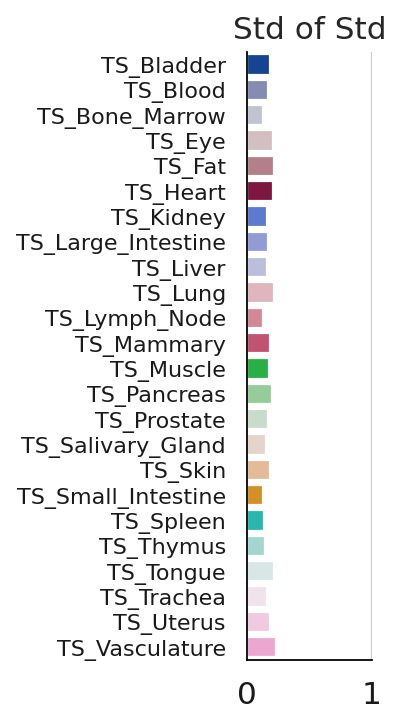

In [136]:
#定义图片大小
pp=plt.figure(figsize=(1,5))
#用ax控制图片
ax=pp.add_subplot(1,1,1)
x = list(human_std.keys())
y1=[]
for i in human_std.keys():
    y1.append(np.std(human_std[i]))
sns.barplot(x=y1, y=x,ax=ax,palette=sc.pl.palettes.zeileis_28)
plt.xlim(0,1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.title('Std of Std')
plt.yticks(fontsize=10)
plt.savefig("figures1/Fig1_std_std.png",dpi=300,bbox_inches = 'tight')

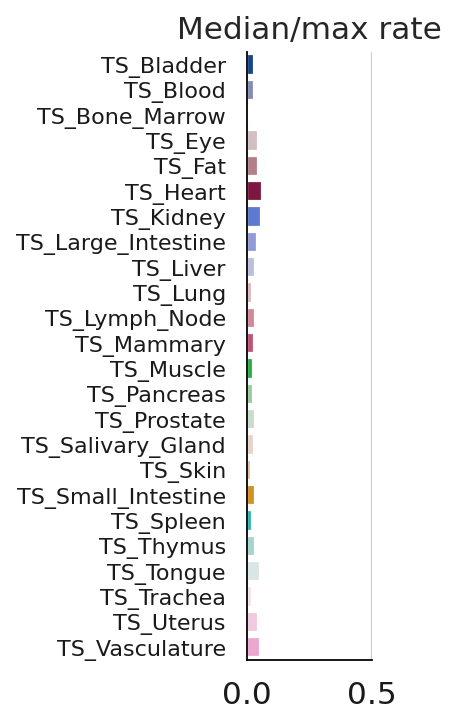

In [138]:
#定义图片大小
pp=plt.figure(figsize=(1,5))
#用ax控制图片
ax=pp.add_subplot(1,1,1)
x = list(human_median.keys())
y1=[]
for i in human_median.keys():
    y1.append(np.std(np.array(human_median[i])/np.array(human_max[i])))
sns.barplot(x=y1, y=x,ax=ax,palette=sc.pl.palettes.zeileis_28)
plt.xlim(0,0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.title('Median/max rate')
plt.yticks(fontsize=10)
plt.savefig("figures1/Fig1_median_max.png",dpi=300,bbox_inches = 'tight')

In [139]:
!zip -r figures1.zip figures1

  adding: figures1/ (stored 0%)
  adding: figures1/fig_max_cor.png (deflated 16%)
  adding: figures1/fig_median_cor.png (deflated 16%)
  adding: figures1/fig_mean_cor.png (deflated 16%)
  adding: figures1/fig_std_cor.png (deflated 16%)
  adding: figures1/sFig1_mean.png (deflated 22%)
  adding: figures1/sFig1_std.png (deflated 24%)
  adding: figures1/sFig1_median.png (deflated 23%)
  adding: figures1/sFig1_max.png (deflated 22%)
  adding: figures1/Fig1_max.png (deflated 5%)
  adding: figures1/Fig1_std.png (deflated 12%)
  adding: figures1/Fig1_mean.png (deflated 11%)
  adding: figures1/Fig1_median.png (deflated 13%)
  adding: figures1/fig_legend.png (deflated 17%)
  adding: figures1/.ipynb_checkpoints/ (stored 0%)
  adding: figures1/.ipynb_checkpoints/fig_legend-checkpoint.png (deflated 16%)
  adding: figures1/Fig1_std_std.png (deflated 15%)
  adding: figures1/Fig1_median_max.png (deflated 15%)
